## STAT 442/842, CM 762 W25 Assignment 2
Andrew Girgis
DUE: Monday February 17 by 11:59pm EST

### Question 5 (10 marks) Manim histogram.

Using the defaults in the Jan 31 lab, construct a histogram of all the removal values in Manim using 20 bars.

- Using 20 bars.
- Setting a y-axis tick mark every 500.
- Setting the y-axis from 0 to 5000.
- Setting the background to white.
- Setting a title above the middle of the graph of "Histogram of Piece Values"

Hint 1: In the Jupyter notebook, hold shift and right-click in order to save an image.



In [1]:
from manim import *
import numpy as np
import pandas as pd

Manim Community v0.19.0

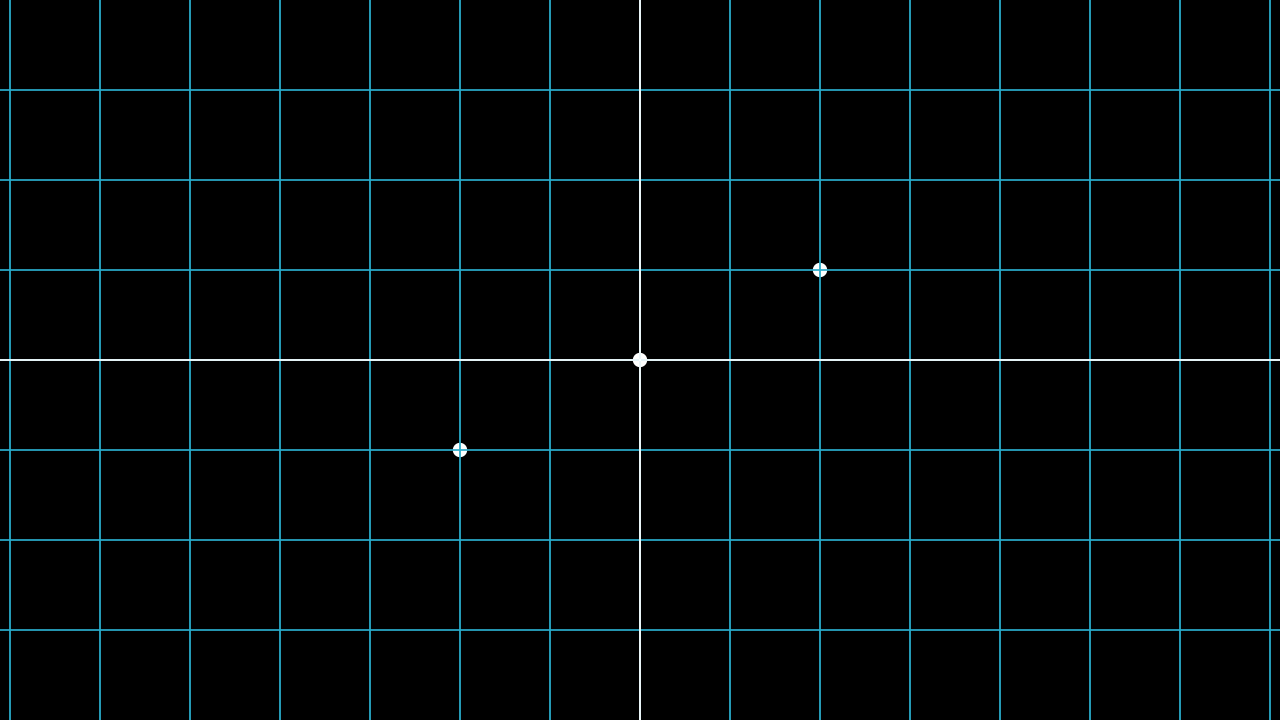

In [2]:
class Dots(Scene):
    def construct(self):
        dot = Dot([-2, -1, 0])
        dot2 = Dot([2, 1, 0])
        dot3 = Dot([0,0,3])
        
        numberplane = NumberPlane()
        self.add(dot, dot2, dot3, numberplane)
        
# don't remove below command for run button to work
%manim -qm -v WARNING Dots

Manim Community v0.19.0

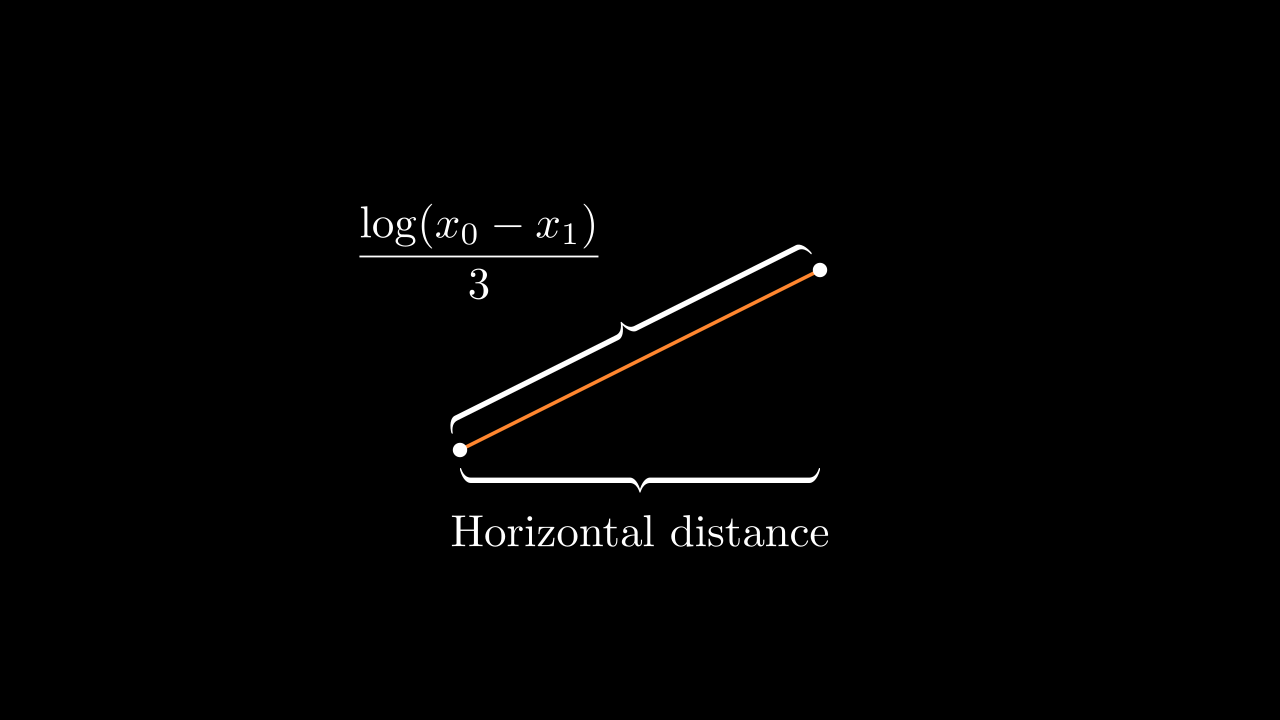

In [3]:
class BraceAnnotation(Scene):
    def construct(self):
        dot = Dot([-2, -1, 0])
        dot2 = Dot([2, 1, 0])
        
        line = Line(dot.get_center(), dot2.get_center()).set_color(ORANGE)
        b1 = Brace(line)
        b2 = Brace(line, direction=line.copy().rotate(PI / 2).get_unit_vector())
        
        b1text = b1.get_text("Horizontal distance")
        b2text = b2.get_tex("\\frac{\\log(x_0-x_1)}{3}")
        
        self.add(line, dot, dot2, b1, b2, b1text, b2text)
        
%manim -qm -v WARNING BraceAnnotation

In [4]:
# create a dataset for the Chess data
import numpy as np
import pandas as pd

data = pd.read_csv("Chess evals 1 piece removed 2024-12-23.csv")

data.head()



,Unnamed: 0,gamecount,site,white_elo,black_elo,white_player,black_player,moves_in,total_moves,pieces_left,...,target_piece,engine_name,hardcode_piece1,hardcode_value1,hardcode_piece2,hardcode_value2,hardcode_piece4,hardcode_value4,hardcode_piece4.1,hardcode_value4.1
0,1,1,https://lichess.org/1PVmIgZn,2251,2266,Redbull22,chessfort,1,21,32,...,R,Fairy Stockfish,R,500,Q,900,B,300,B,300
1,2,1,https://lichess.org/1PVmIgZn,2251,2266,Redbull22,chessfort,2,21,32,...,R,Fairy Stockfish,R,500,Q,900,B,300,B,300
2,3,1,https://lichess.org/1PVmIgZn,2251,2266,Redbull22,chessfort,3,21,31,...,R,Fairy Stockfish,R,500,Q,900,B,300,B,300
3,4,1,https://lichess.org/1PVmIgZn,2251,2266,Redbull22,chessfort,4,21,31,...,R,Fairy Stockfish,R,500,Q,900,B,300,B,300
4,5,1,https://lichess.org/1PVmIgZn,2251,2266,Redbull22,chessfort,5,21,31,...,R,Fairy Stockfish,R,500,Q,900,B,300,B,300


Manim Community v0.19.0

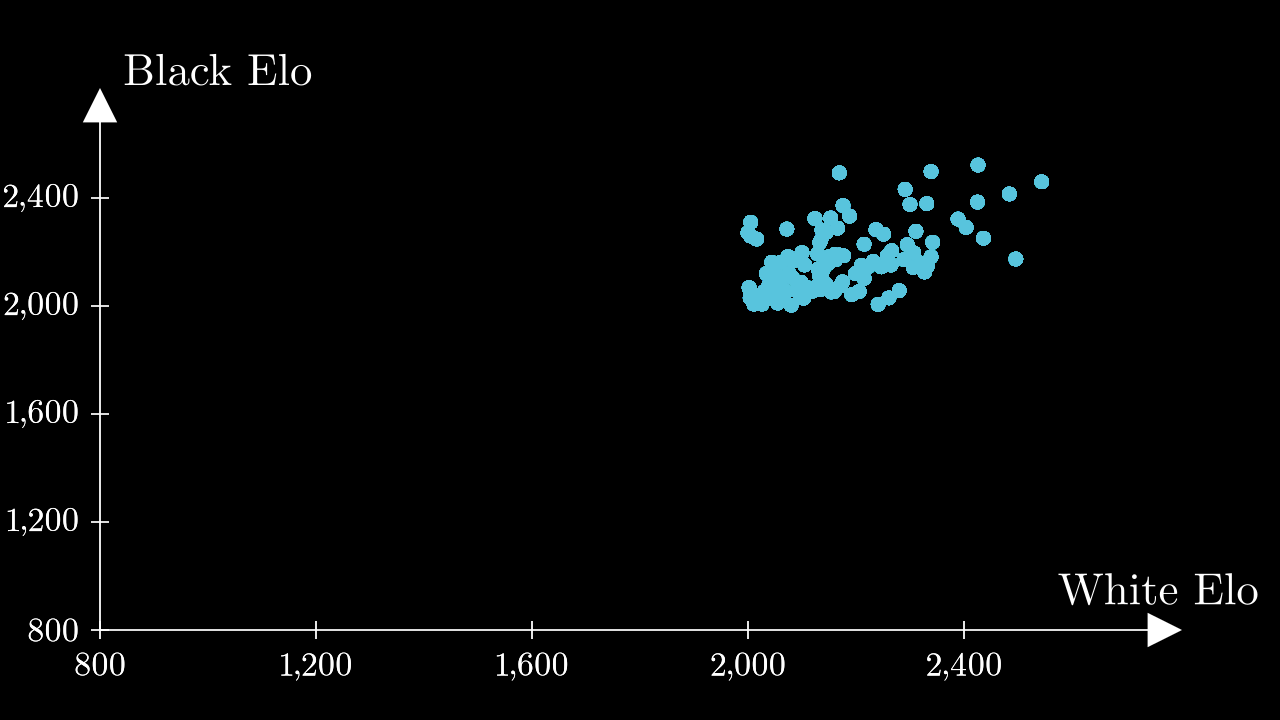

Manim Community v0.19.0

In [5]:
class ScatterPlot(Scene):
    def construct(self):
        # Create axes with labels
        axes = Axes(
            x_range=[800, 2800, 400],  # Min, Max, Step
            y_range=[800, 2800, 400],
            axis_config={"include_numbers": True}
        ).add_coordinates()

        # Add labels
        x_label = axes.get_x_axis_label(Tex("White Elo"))
        y_label = axes.get_y_axis_label(Tex("Black Elo"))
        
        # Normalize the data to fit the coordinate range
        dots = []
        for i in range(len(data['white_elo'])):
            x_scaled = data['white_elo'][i]
            y_scaled = data['black_elo'][i]
            dot = Dot(axes.c2p(x_scaled, y_scaled), color=BLUE)
            dots.append(dot)

        # Add everything to the scene
        self.add(axes, x_label, y_label, *dots)


# Run the animation
%manim -qm -v WARNING ScatterPlot

class ScatterPlotWithRegression(Scene):
    def construct(self):
        # Create axes with labels
        axes = Axes(
            x_range=[800, 2800, 400],  # Min, Max, Step
            y_range=[800, 2800, 400],
            axis_config={"include_numbers": True}
        ).add_coordinates()

        # Add labels
        x_label = axes.get_x_axis_label(Tex("White Elo"))
        y_label = axes.get_y_axis_label(Tex("Black Elo"))
        
        # Normalize the data to fit the coordinate range
        dots = []
        for i in range(len(data['white_elo'])):
            x_scaled = data['white_elo'][i]
            y_scaled = data['black_elo'][i]
            dot = Dot(axes.c2p(x_scaled, y_scaled), color=BLUE)
            dots.append(dot)

        # Add everything to the scene
        self.add(axes, x_label, y_label, *dots)

        # Create a linear regression line
        x = np.array(data['white_elo'])
        y = np.array(data['black_elo'])
        m, b = np.polyfit(x, y, 1)
        regression_line = axes.plot(lambda x: m*x + b)
        
        # Add the regression line to the scene with run time of 2 seconds
        self.play(Create(regression_line), run_time=2)

# Run the animation with caching disabled
get_ipython().run_line_magic('manim', '-qm -v WARNING --disable_caching ScatterPlotWithRegression')

In [6]:
data.columns

Index(['Unnamed: 0', 'gamecount', 'site', 'white_elo', 'black_elo',
       'white_player', 'black_player', 'moves_in', 'total_moves',
       'pieces_left', 'active_colour', 'fen', 'evals', 'loc_removed',
       'fen_removed', 'evals_removed', 'remove_value', 'target_piece',
       'engine_name', 'hardcode_piece1', 'hardcode_value1', 'hardcode_piece2',
       'hardcode_value2', 'hardcode_piece4', 'hardcode_value4',
       'hardcode_piece4.1', 'hardcode_value4.1'],
      dtype='object')

Manim Community v0.19.0

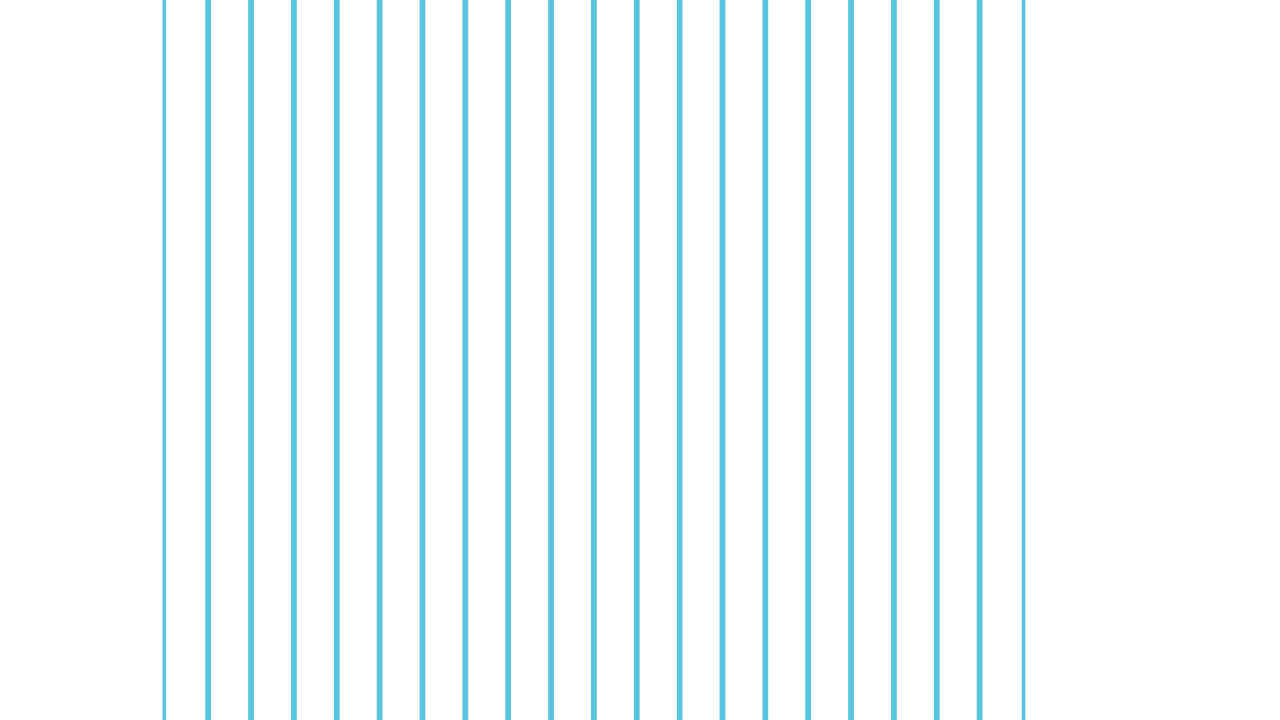

In [7]:
# #construct a histogram of all the removal values in Manim using 20 bars.

# - Using 20 bars.
# - Setting a y-axis tick mark every 500.
# - Setting the y-axis from 0 to 5000.
# - Setting the background to white.
# - Setting a title above the middle of the graph of "Histogram of Piece Values"

class Histogram(Scene):
    def construct(self):
        self.camera.background_color = WHITE
        # Create axes with labels
        axes = Axes(
            x_range=[-1, 20, 1],  # Min, Max, Step
            y_range=[0, 5000, 500],
            axis_config={"include_numbers": True},
            y_length=6,
            x_length=10,
            tips=False,
            color=BLACK
        ).add_coordinates()

        # Filter out NaN values from the 'remove_value' column
        filtered_data = data['remove_value'].dropna().reset_index(drop=True)

        # Add labels
        x_label = axes.get_x_axis_label(Tex("Piece Value"))
        y_label = axes.get_y_axis_label(Tex("Frequency"))
        title = Text("Histogram of Piece Values").move_to(axes.c2p(10, 5000))

        axes.to_edge(LEFT, buff=1)

             # Create histogram bars
        bars = []
        for i in range(min(20, len(filtered_data))):
            bar = Rectangle(height=filtered_data[i], width=0.5, color=BLUE)
            bar.move_to(axes.c2p(i, filtered_data[i]/4))
        for i in range(20):
            bar = Rectangle(height=data['remove_value'][i], width=0.5, color=BLUE)
            bar.move_to(axes.c2p(i, data['remove_value'][i]/4))
            bars.append(bar)

        # Add everything to the scene
        self.add(axes, x_label, y_label, title, *bars)

# Run the animation
%manim -qm -v WARNING Histogram

Manim Community v0.19.0

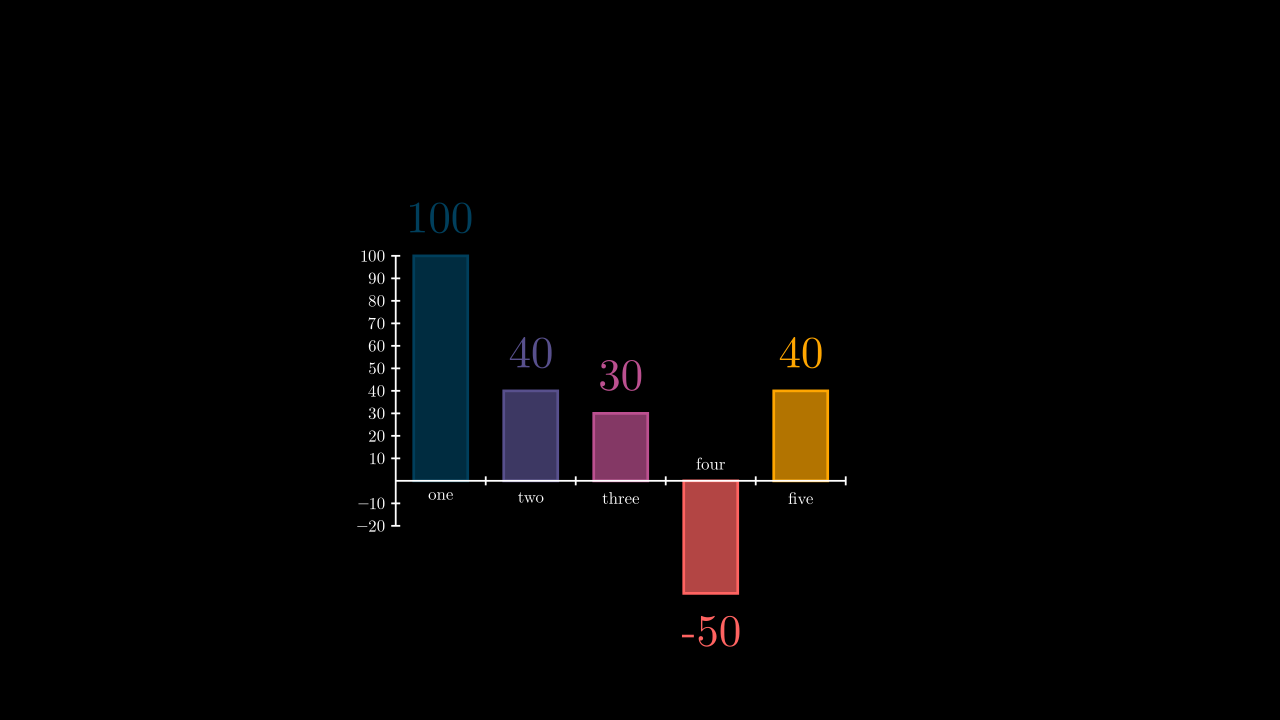

In [8]:
# #construct a histogram of all the removal values in Manim using 20 bars.

# - Using 20 bars.
# - Setting a y-axis tick mark every 500.
# - Setting the y-axis from 0 to 5000.
# - Setting the background to white.
# - Setting a title above the middle of the graph of "Histogram of Piece Values"

import matplotlib.pyplot as plt

class BarChartExample0(Scene):
    def construct(self):
        chart = BarChart(
            values=[100, 40, 30, -50, 40],
            bar_names=["one", "two", "three", "four", "five"],
            y_range=[-20, 100, 10],
            y_length=6,
            x_length=10,
            x_axis_config={"font_size": 36},
        ).scale(0.5)

        c_bar_lbls = chart.get_bar_labels(font_size=48)

        self.add(chart, c_bar_lbls)



# don't remove below command for run button to work
%manim -qm -v WARNING BarChartExample0

Manim Community v0.19.0

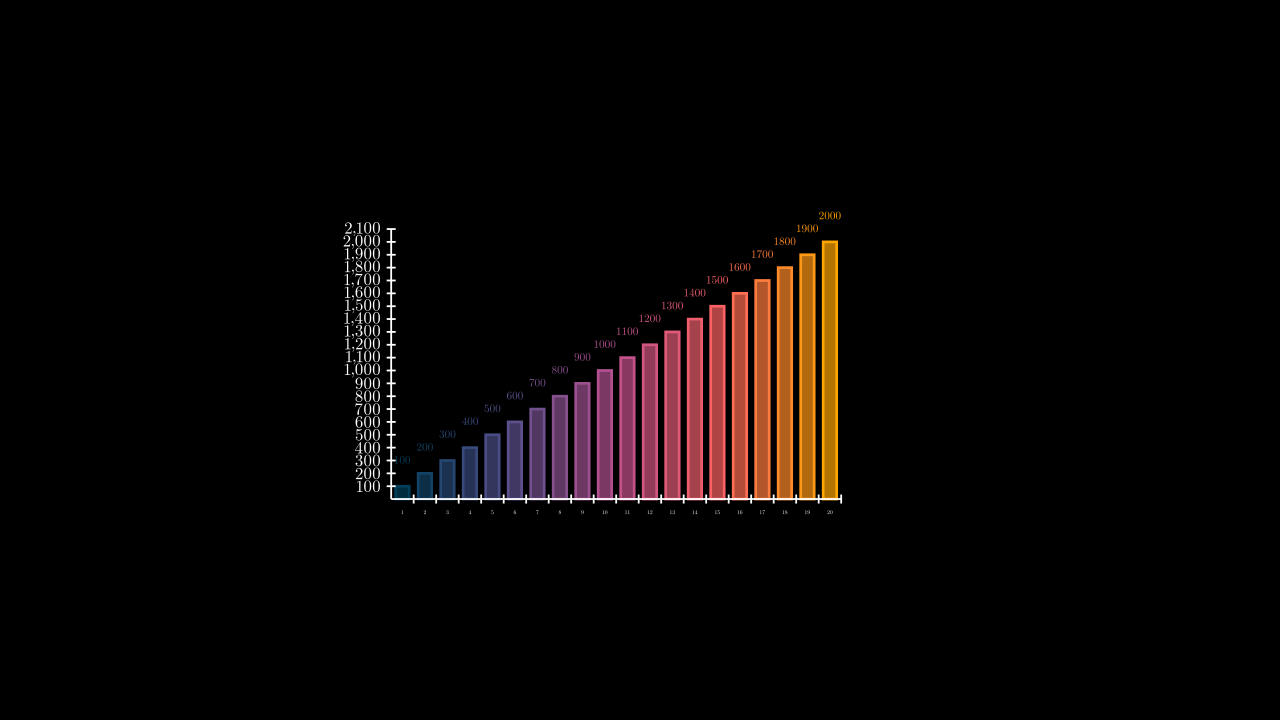

In [9]:
from manim import *

class HistogramOfRemoveValue(Scene):
    def construct(self):
        # Assuming data['remove_value'] is a list of values
        remove_value = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]

        # Create the BarChart
        chart = BarChart(
            values=remove_value,
            bar_names=[str(i) for i in range(1, len(remove_value) + 1)],
            y_range=[0, max(remove_value) + 100, 100],
            y_length=6,
            x_length=10,
            x_axis_config={"font_size": 12},
        ).scale(0.5)

        # Get bar labels
        c_bar_lbls = chart.get_bar_labels(font_size=12)

        # Add the chart and labels to the scene
        self.add(chart, c_bar_lbls)

# don't remove below command for run button to work
%manim -qm -v WARNING --disable_caching HistogramOfRemoveValue

In [25]:
#convert remove_value to absolute values
data['remove_value'] = data['remove_value'].abs()

data['bin_remove'] = pd.cut(data['remove_value'], bins=20)

#remove the NaN values from the 'bin_remove' column
data = data.dropna(subset=['bin_remove'])

#check for nan values
data.isnull().sum()

Unnamed: 0           0
gamecount            0
site                 0
white_elo            0
black_elo            0
white_player         0
black_player         0
moves_in             0
total_moves          0
pieces_left          0
active_colour        0
fen                  0
evals                0
loc_removed          0
fen_removed          0
evals_removed        0
remove_value         0
target_piece         0
engine_name          0
hardcode_piece1      0
hardcode_value1      0
hardcode_piece2      0
hardcode_value2      0
hardcode_piece4      0
hardcode_value4      0
hardcode_piece4.1    0
hardcode_value4.1    0
bin_remove           0
dtype: int64

In [26]:
unique, counts = np.unique(data.bin_remove, return_counts=True)

print(unique)
print(counts)

[Interval(-11.556, 577.8, closed='right')
 Interval(577.8, 1155.6, closed='right')
 Interval(1155.6, 1733.4, closed='right')
 Interval(1733.4, 2311.2, closed='right')
 Interval(2311.2, 2889.0, closed='right')
 Interval(2889.0, 3466.8, closed='right')
 Interval(3466.8, 4044.6, closed='right')
 Interval(4044.6, 4622.4, closed='right')
 Interval(4622.4, 5200.2, closed='right')
 Interval(5200.2, 5778.0, closed='right')
 Interval(5778.0, 6355.8, closed='right')
 Interval(6355.8, 6933.6, closed='right')
 Interval(6933.6, 7511.4, closed='right')
 Interval(7511.4, 8089.2, closed='right')
 Interval(8089.2, 8667.0, closed='right')
 Interval(10400.4, 10978.2, closed='right')
 Interval(10978.2, 11556.0, closed='right')]
[15649 17549  6836   330    65    16     1     3    99   219    88    79
    37     8     2     4    17]


In [27]:
midpoints = []

for i in range(len(unique)):
        midpoints.append(np.round((unique[i].left + unique[i].right) / 2, decimals=2))

midpoints

[np.float64(283.12),
 np.float64(866.7),
 np.float64(1444.5),
 np.float64(2022.3),
 np.float64(2600.1),
 np.float64(3177.9),
 np.float64(3755.7),
 np.float64(4333.5),
 np.float64(4911.3),
 np.float64(5489.1),
 np.float64(6066.9),
 np.float64(6644.7),
 np.float64(7222.5),
 np.float64(7800.3),
 np.float64(8378.1),
 np.float64(10689.3),
 np.float64(11267.1)]

Manim Community v0.19.0

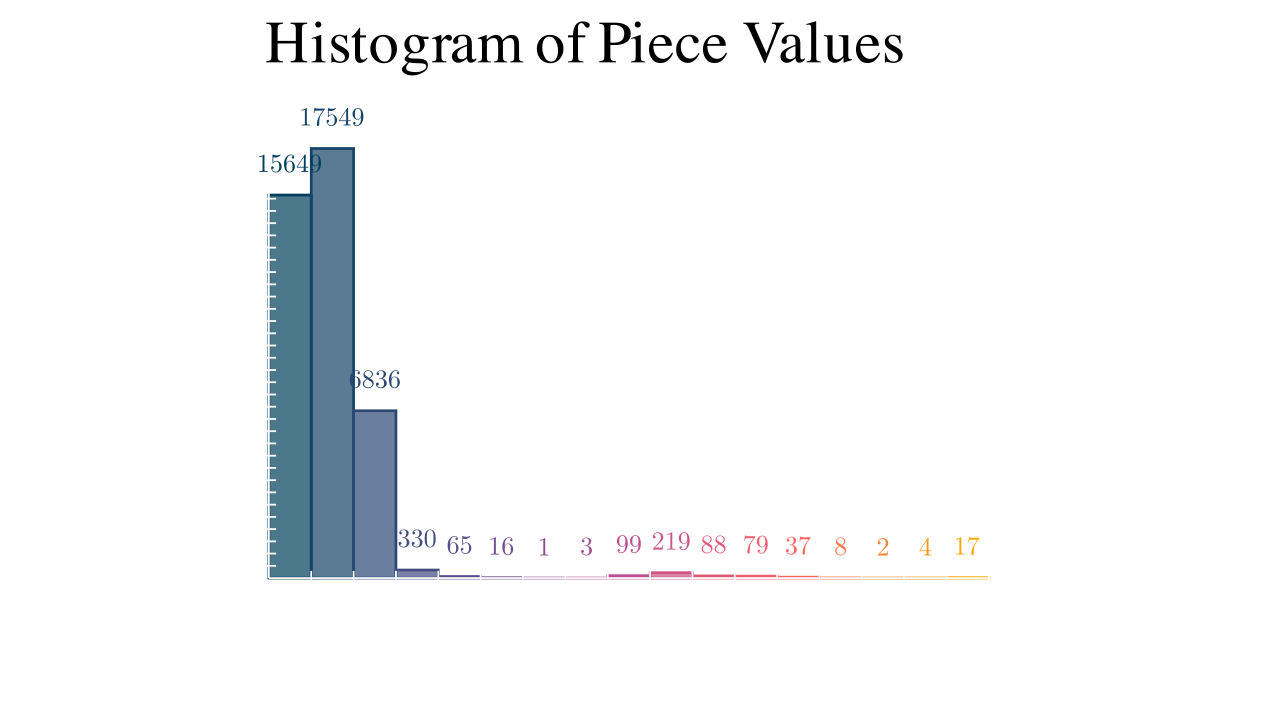

In [46]:
from manim import *

class HistogramOfRemoveValue(Scene):
    def construct(self):
        self.camera.background_color = WHITE        

        chart = BarChart(
            bar_width=1,
            values=counts,
            bar_names=[str(i) for i in midpoints],
            y_range=[0, np.max(counts) + 100, 500],
            y_length=6,
            x_length=10,
            x_axis_config={"font_size": 12},
        ).scale(0.8)

        c_bar_lbls = chart.get_bar_labels(font_size=28)

        # Add a title to the chart
        title = Text("Histogram of Piece Values", color=BLACK).move_to(chart.get_top() + UP)

        # #make it write the title
        # self.play(Write(title))

        #Add the title to the scene
        self.add(title)

        # Add the chart and labels to the scene
        self.add(chart, c_bar_lbls)

        # #make the bars grow into the chart only grow on the y-axis not the x-axis
        # self.play(*[GrowFromPoint(bar, bar.get_bottom(), run_time=2) for bar in chart.bars])

        # #play the animation
        # self.wait(2)


# Run the animation
%manim -qm -v WARNING --disable_caching HistogramOfRemoveValue